# Lista 2 - Condição de contorno Momento senoidal na borda

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp

>__É introduzida as variaveis no formato simbólico__

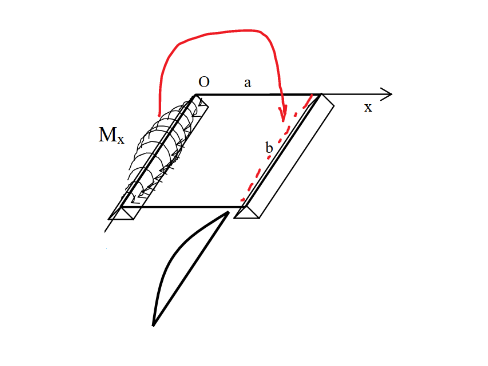

In [2]:
x, y, a, c1, c2, c3, c4 ,v,  b, p, d ,E= smp.symbols('x y a c1 c2 c3 c4 v b p d E')


In [3]:
b=10
p=10
a=smp.pi/b
E=25000000
v=0.3
d=E*0.3**3/(12*(1-v**2))

A solução geral para a equação homogenêa de placas é dada por:

>$\Large w=\frac{(𝑐1cosh(𝑥α)+𝑐2𝑥αsinh(𝑥α)+𝑐3sinh(𝑥α)+𝑐4𝑥αcosh(𝑥α))sin(𝑦α)}{α2}$

assim o momento em x é dado por:

>$\Large\frac{dw^2}{d^2x}+\nu\frac{dw^2}{d^2y}$


In [4]:
w=smp.sin(a*y)*(1/a**2*(c1*smp.cosh(a*x)+c2*(a*x)*smp.sinh(a*x)+c3*smp.sinh(a*x)+c4*a*x*smp.cosh(a*x)))


>é aplicada a condição de contorno 

>$\Large w(0,y)=0\,\,\,\,\,\forall y$

In [5]:
w0=w.subs([(x,0)])
w0


100*c1*sin(pi*y/10)/pi**2

In [6]:
C1=smp.solve(w0,c1)
C1=C1[0]

>É aplicada a condição de contorno:

>$\Large M(0,y)=0\,\,\,\,\,\forall y$



<bs> E o momento é dado por

In [7]:
dwdx2=smp.diff((smp.diff(w,x)),x)
dwdy2=smp.diff((smp.diff(w,y)),y)
mx=(dwdx2+v*dwdy2)

In [8]:
mx0=mx.subs([(x,0),(c1,C1)])
mx0

2*c2*sin(pi*y/10)

In [9]:
C2=smp.solve(mx0,c2)
C2=C2[0]

>é aplicada a condição de contorno 

>$\Large w(a,y)=0\,\,\,\,\,\forall y$

In [10]:

wa=w.subs([(x,10),(c1,C1),(c2,C2),(a,10)])


>é aplicada a condição de contorno 

>$\Large M(a,y)=p\sin{ay}\,\,\,\,\,\forall y$

In [11]:
ma=mx.subs([(x,10),(c1,C1),(c2,C2)])-p/d*smp.sin(a*y)


In [12]:
sols=smp.solve([wa,ma],[c3,c4])
sols



{c3: -2.20864646598041e-5, c4: 7.00413148020825e-6}

In [13]:
C3=sols[c3]
C4=sols[c4]
C1=0
C2=0

In [14]:
w=smp.sin(a*y)*(1/a**2*(C1*smp.cosh(a*x)+C2*(a*x)*smp.sinh(a*x)+C3*smp.sinh(a*x)+C4*a*x*smp.cosh(a*x)))


In [15]:
dwdx2=smp.diff((smp.diff(w,x)),x)
dwdy2=smp.diff((smp.diff(w,y)),y)
mx=d*(dwdx2+v*dwdy2)
my=d*(dwdy2+v*dwdx2)

In [16]:
omg=smp.lambdify([x,y],w)
wa=w.subs([(a,10),(b,10)])
Mx=smp.lambdify([x,y],mx)
My=smp.lambdify([x,y],my)

In [17]:
m1 = np.linspace(0,10,100)
m2 = np.linspace(0,10,100)
x1,y1=np.meshgrid(m1,m2)

<a list of 17 text.Text objects>

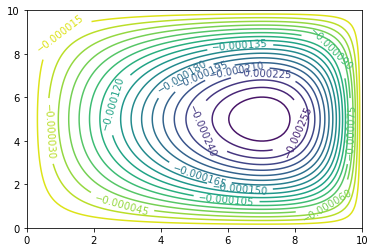

In [18]:
cont=plt.contour(x1,y1,omg(x1,y1),levels=20)
plt.clabel(cont)

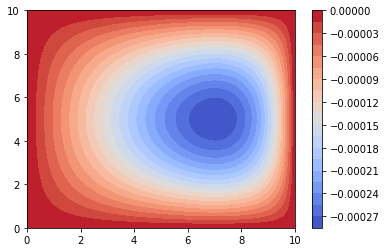

In [19]:
plt.contourf(x1,y1,omg(x1,y1),levels=20, cmap='coolwarm')
plt.colorbar()

-0.0

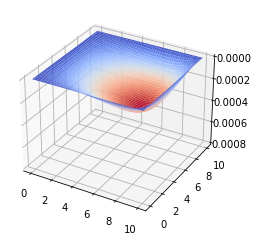

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1,y1,-omg(x1,y1),cmap='coolwarm',)
ax.set_zlim3d(0.0008,0)
omg(10,0)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_16040\1374822030.py:1: UserWarning: The following kwargs were not used by contour: 'size'
  plt.contourf(x1,y1,Mx(x1,y1),levels=20, cmap='seismic',size=(10,10))


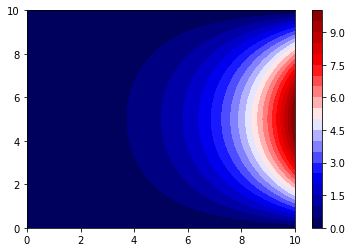

In [21]:
plt.contourf(x1,y1,Mx(x1,y1),levels=20, cmap='seismic')
plt.colorbar()
#momento em x

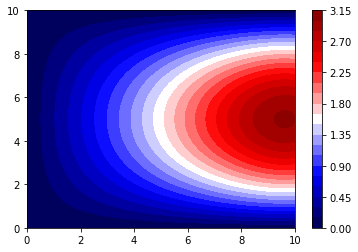

In [22]:
plt.contourf(x1,y1,My(x1,y1),levels=20, cmap='seismic')
plt.colorbar()
#momento em y